# **Importing Libraries**

In [3]:
# Importing basic required libraries
import pandas as pd
import numpy as np

# Importing librarires for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing libraries required for building models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,log_loss, accuracy_score, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading training data set
train_data = pd.read_csv('/content/drive/MyDrive/Company Assignment/Arya AI/training_set.csv')

In [5]:
# Setting maximum limist to show columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# **Data Cleaning**

In [6]:
# Look for number of rows and columns in dataset
train_data.shape

(3910, 59)

In [7]:
# First look of data
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [8]:
train_data.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.12,0.25,0.0,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,0.48,0.00,0.00,0.0,1.44,0.48,0.48,2.41,0.00,0.0,0.96,0.0,0.0,0.48,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.48,0.0,0.0,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


In [9]:
# Droping column 'Unnamed: 0' as we have index already
train_data.drop('Unnamed: 0', axis=1, inplace=True)

## Checking for duplicates:

In [10]:
# Number of duplicates present in dataset
len(train_data[train_data.duplicated()])

296

* 296 rows have duplicates.

In [11]:
# Removing all the duplicates by keeping first row from duplicates
train_data.drop_duplicates(inplace=True)

In [12]:
# Check for removed duplicates
len(train_data[train_data.duplicated()])

0

* Now no rows are duplicated.

In [13]:
# shape will change
train_data.shape

(3614, 58)

## Checking for Null Values:


In [14]:
# sum of all null the values in dataset
train_data.isna().sum().sum()

0

* Don't have any null value.

## Summary of Data Types & Data:

In [15]:
# to look for data types of all features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3614 non-null   float64
 1   X2      3614 non-null   float64
 2   X3      3614 non-null   float64
 3   X4      3614 non-null   float64
 4   X5      3614 non-null   float64
 5   X6      3614 non-null   float64
 6   X7      3614 non-null   float64
 7   X8      3614 non-null   float64
 8   X9      3614 non-null   float64
 9   X10     3614 non-null   float64
 10  X11     3614 non-null   float64
 11  X12     3614 non-null   float64
 12  X13     3614 non-null   float64
 13  X14     3614 non-null   float64
 14  X15     3614 non-null   float64
 15  X16     3614 non-null   float64
 16  X17     3614 non-null   float64
 17  X18     3614 non-null   float64
 18  X19     3614 non-null   float64
 19  X20     3614 non-null   float64
 20  X21     3614 non-null   float64
 21  X22     3614 non-null   float64
 22  

* Data types of all the features are correct.

In [16]:
# Summary of all the features
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,3614.0,0.102892,0.291468,0.0,0.000,0.0000,0.00000,4.340
X2,3614.0,0.112488,0.455705,0.0,0.000,0.0000,0.00000,14.280
X3,3614.0,0.293149,0.513610,0.0,0.000,0.0000,0.45000,4.540
X4,3614.0,0.067158,1.424230,0.0,0.000,0.0000,0.00000,42.810
X5,3614.0,0.324723,0.669971,0.0,0.000,0.0000,0.41000,9.090
X6,3614.0,0.097197,0.263620,0.0,0.000,0.0000,0.00000,3.570
X7,3614.0,0.116190,0.395445,0.0,0.000,0.0000,0.00000,7.270
X8,3614.0,0.109474,0.408872,0.0,0.000,0.0000,0.00000,11.110
X9,3614.0,0.092576,0.273720,0.0,0.000,0.0000,0.00000,3.230
X10,3614.0,0.253163,0.677929,0.0,0.000,0.0000,0.20000,18.180


* Most of the features contains zeros only.

## Sparsity of Data:


In [17]:
a = (train_data.to_numpy() == 0.00).mean()*100
print (a)

76.54809839131347


* Almost 77% of data is zeros.

In [18]:
# Percentage of sparsity for each column
for col in train_data.columns:
  total_zeros = train_data[train_data[col] == 0.00].shape[0]
  print(f"{col} : {round(total_zeros/train_data.shape[0]*100,2)}")

X1 : 76.81
X2 : 80.8
X3 : 57.42
X4 : 98.92
X5 : 60.29
X6 : 77.59
X7 : 81.88
X8 : 81.38
X9 : 82.79
X10 : 70.86
X11 : 84.42
X12 : 47.48
X13 : 80.8
X14 : 91.98
X15 : 92.86
X16 : 72.3
X17 : 78.44
X18 : 76.92
X19 : 27.12
X20 : 90.68
X21 : 45.88
X22 : 97.59
X23 : 85.28
X24 : 84.2
X25 : 74.71
X26 : 81.29
X27 : 83.79
X28 : 89.35
X29 : 91.51
X30 : 89.18
X31 : 93.36
X32 : 95.27
X33 : 90.65
X34 : 95.05
X35 : 88.77
X36 : 86.58
X37 : 80.94
X38 : 98.06
X39 : 90.81
X40 : 89.93
X41 : 96.65
X42 : 92.09
X43 : 91.64
X44 : 92.36
X45 : 70.42
X46 : 88.57
X47 : 98.53
X48 : 95.3
X49 : 82.26
X50 : 38.35
X51 : 87.77
X52 : 49.42
X53 : 69.06
X54 : 83.23
X55 : 0.0
X56 : 0.0
X57 : 0.0
Y : 60.21


* 17 features contains more than 90% zeros only.

# **EDA**

In [19]:
# Creating copy of data
df = train_data.copy()

## **Univariate Analysis:**

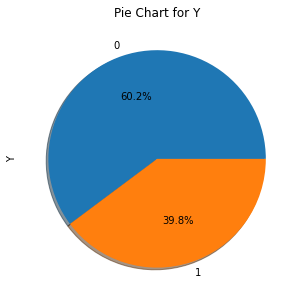

In [20]:
# Checking for class proprtion in dependent varibale
df['Y'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title('Pie Chart for Y')
plt.show()

* We have 40% - 60% class data.
* Dataset is slight imbalance.

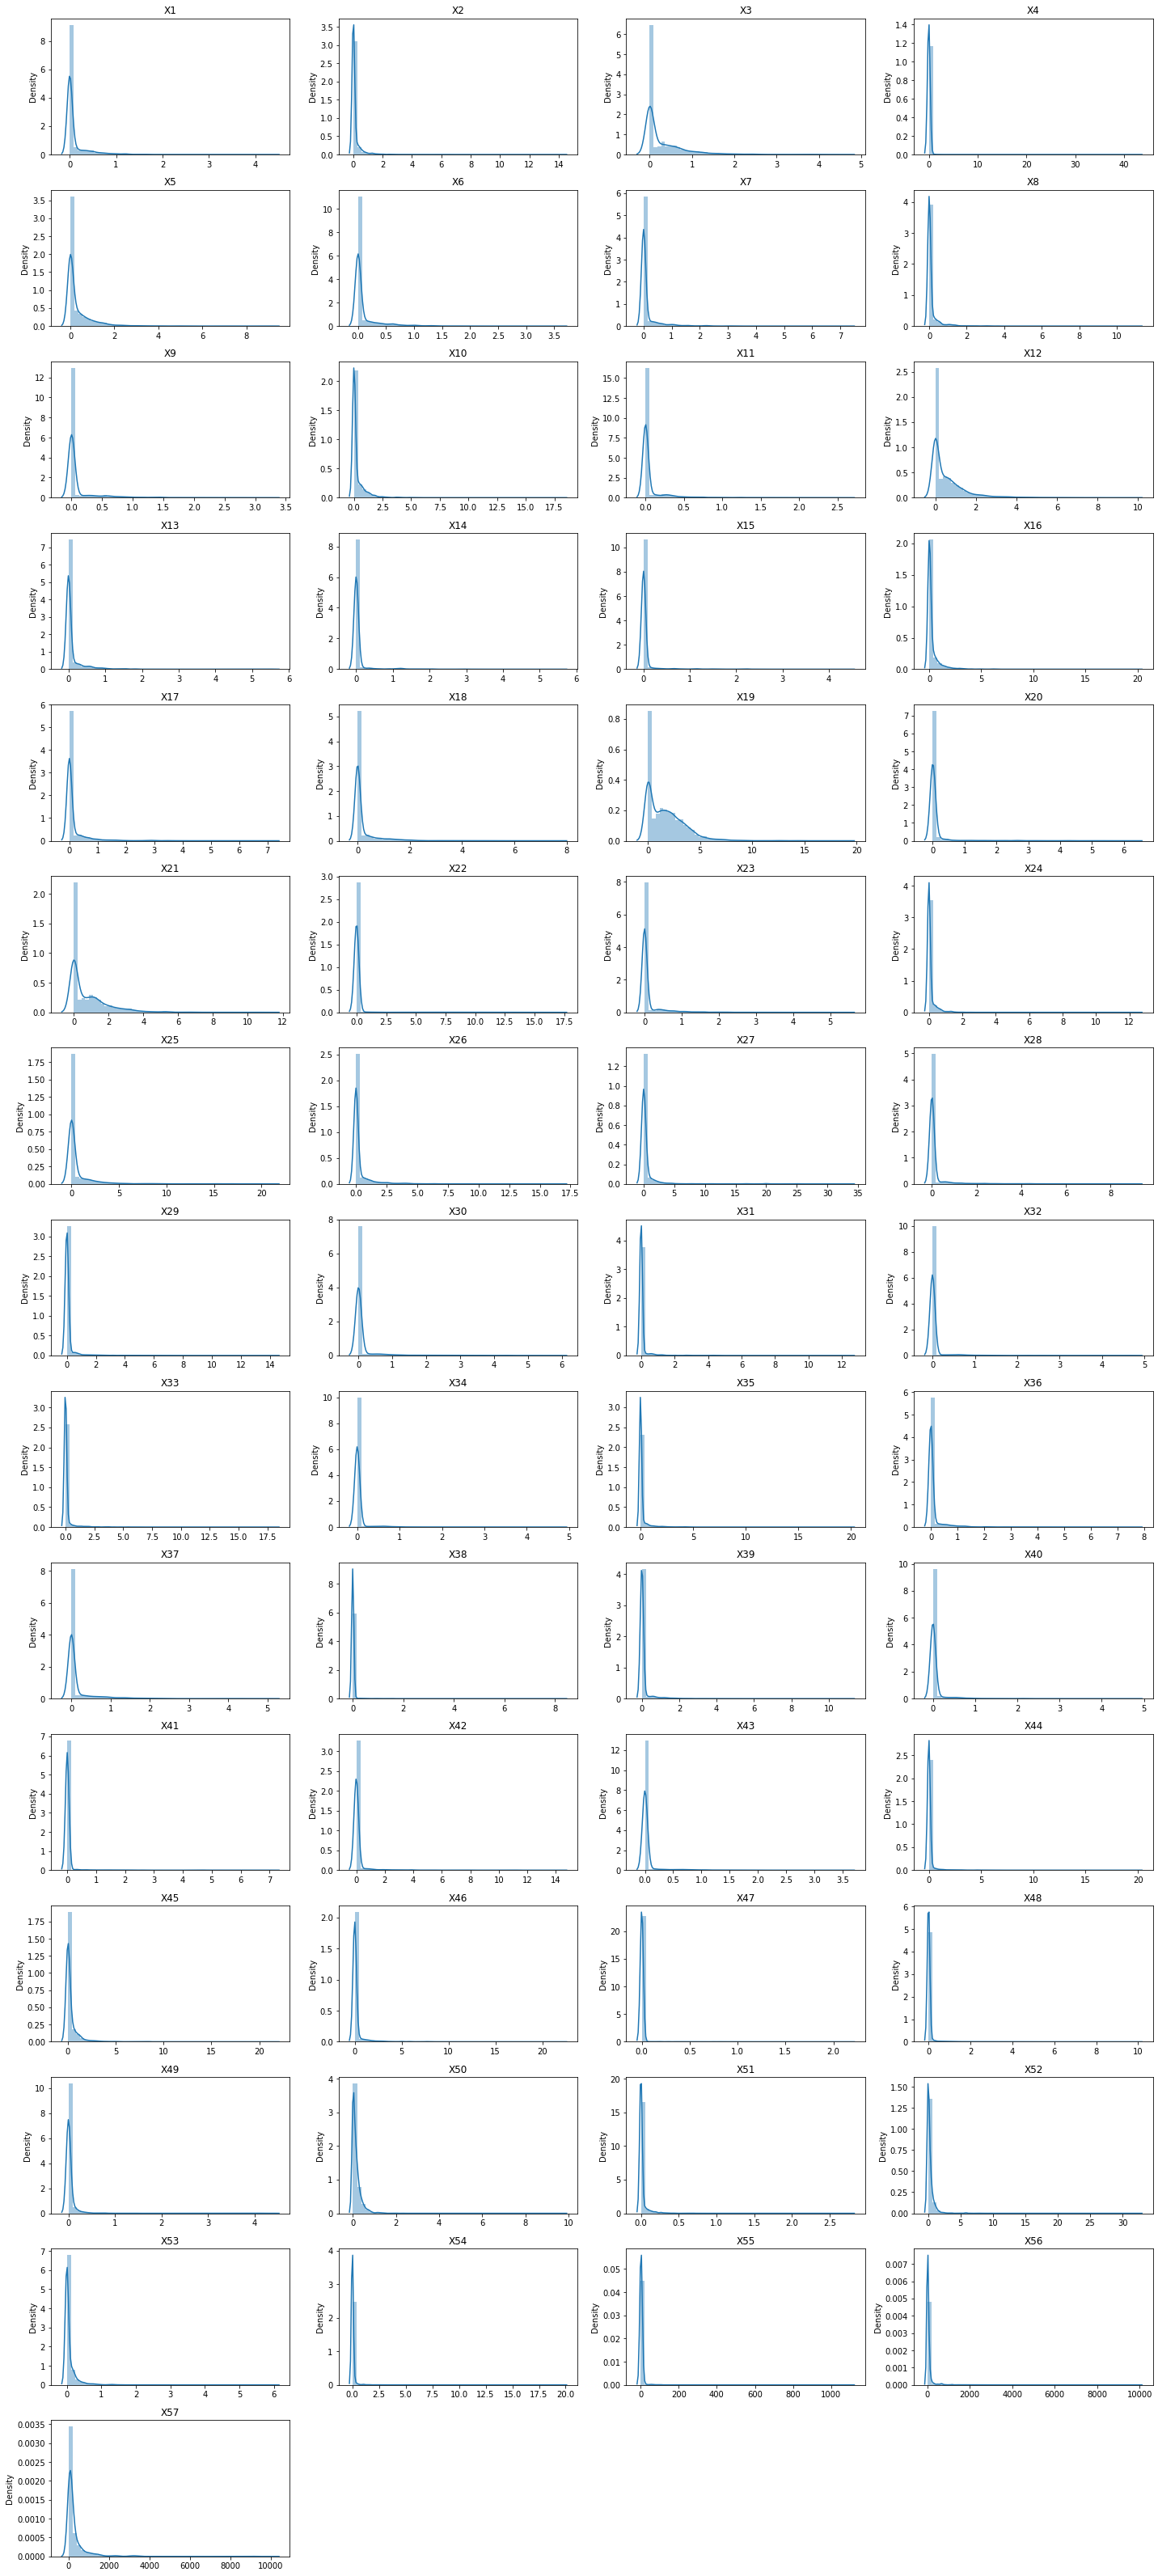

In [21]:
# Distribution of each feature
plt.figure(figsize =(20,50))
for i , variable in enumerate(df.columns[:-1]):
    plt.subplot(17, 4, i +1)
    sns.distplot(x = df[variable])
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

* All features are highly right skewed.
* Which means that outliers are present in data.

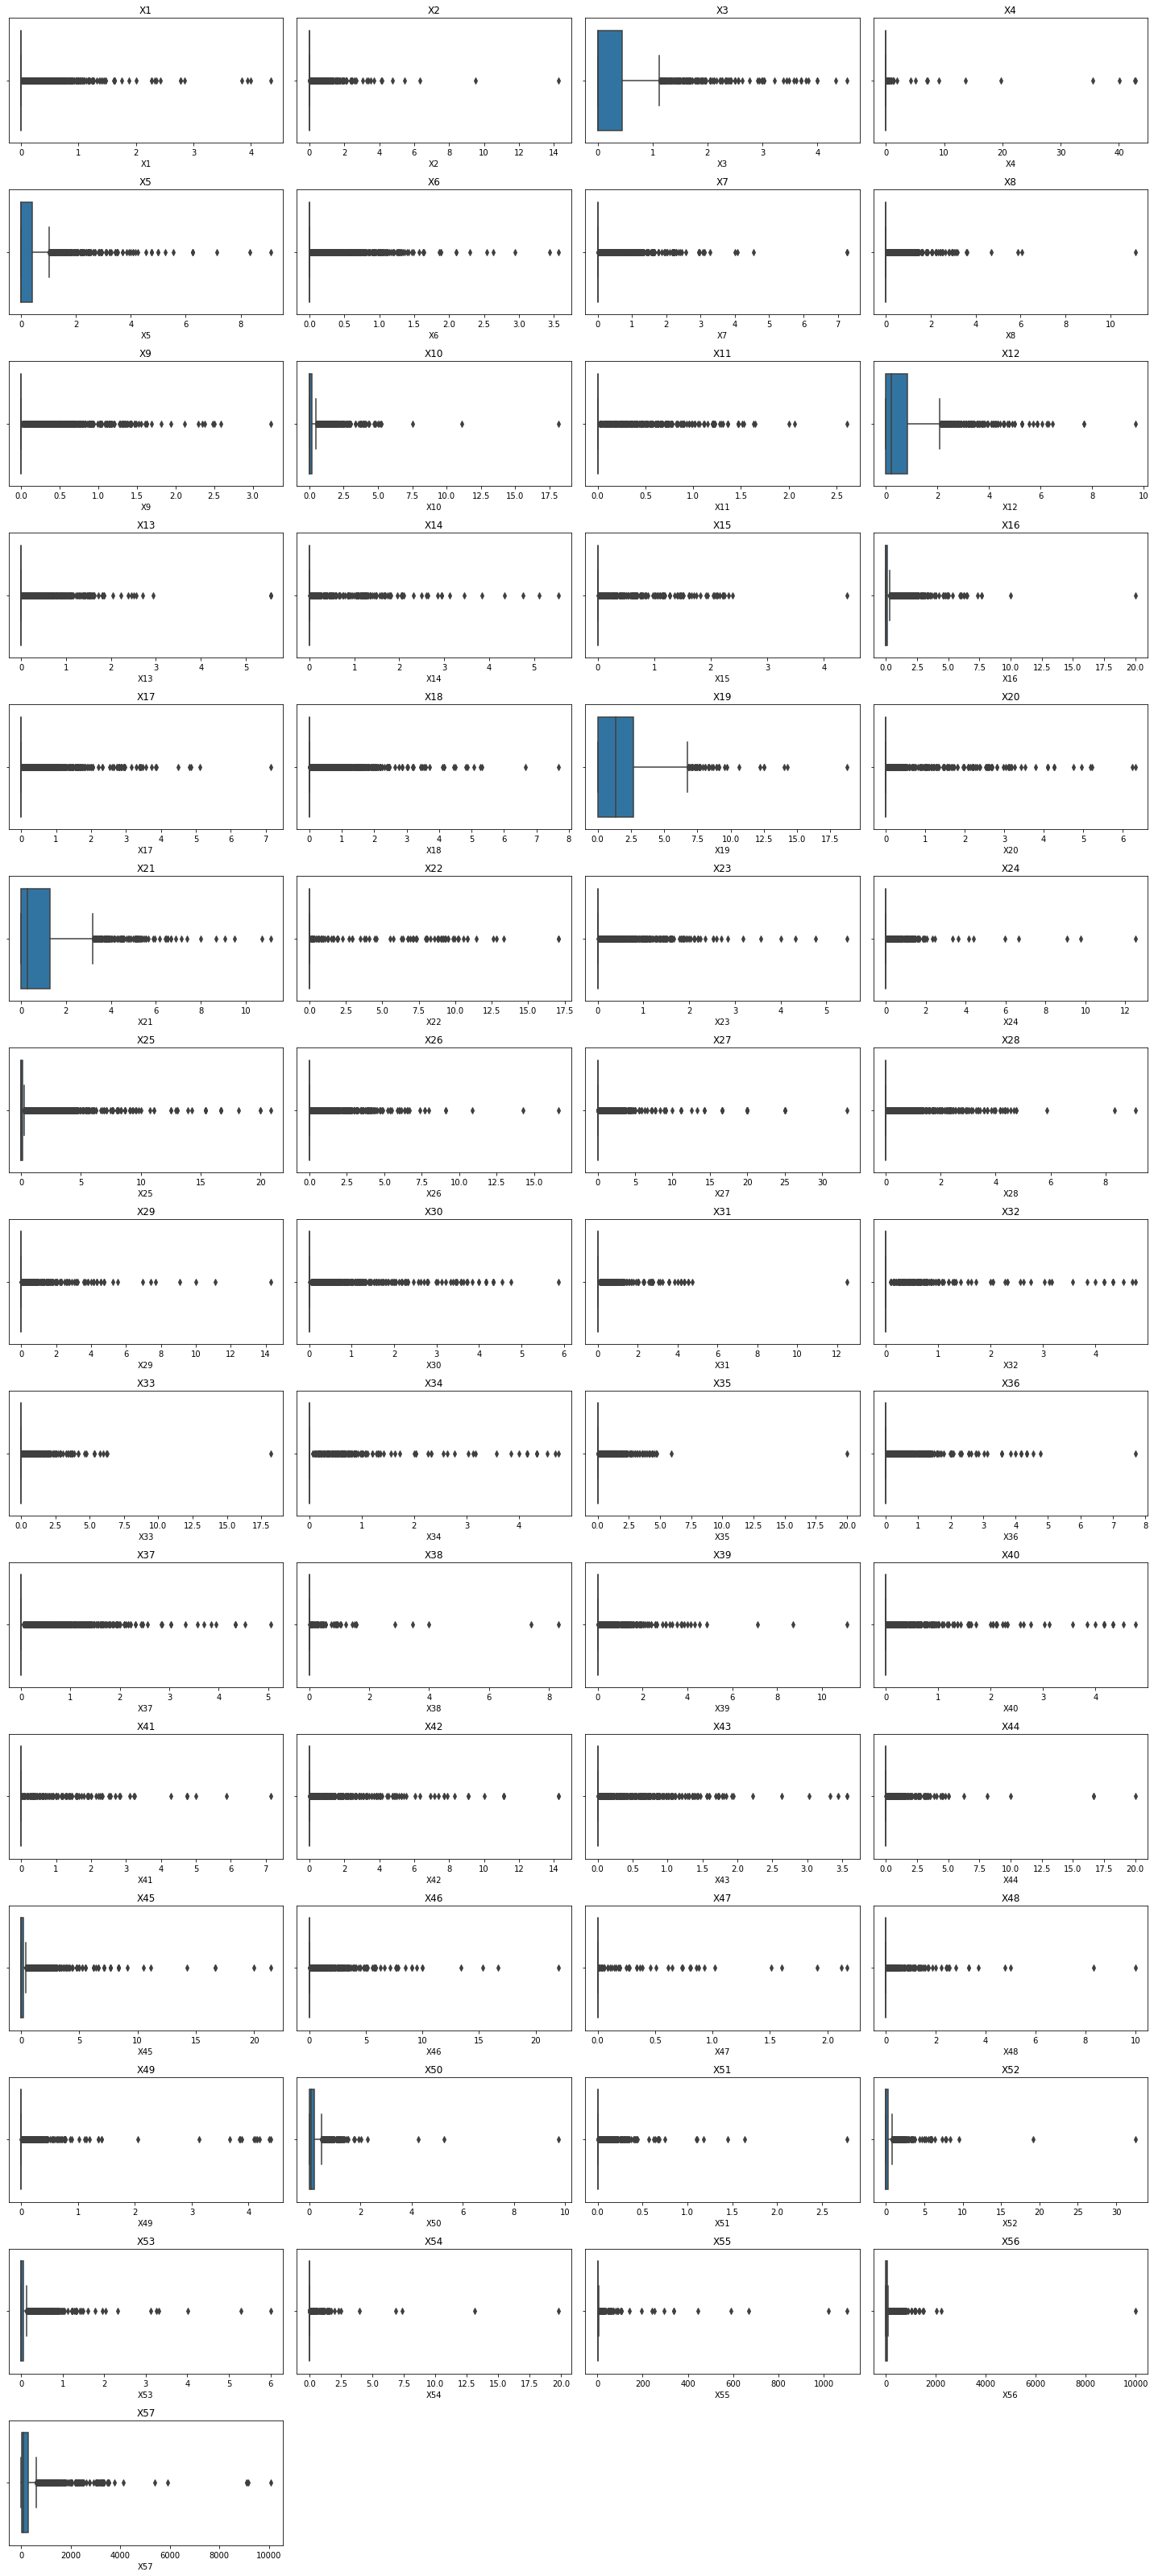

In [22]:
# Plotting box plot for outlier detection
plt.figure(figsize =(20,50))
for i , variable in enumerate(df.columns[:-1]):
    plt.subplot(17, 4, i +1)
    sns.boxplot(x = df[variable])
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

* Every feature has some outliers.
* Dataset contains only 3614 rows, that is dataset is not huge.
* So it wont be feasible to remove all the outliers.
* So we will be doing standardisation, which can solve problem of outliers to some extent.

## **Standardization**

In [23]:
# Seperating dependent and independent varibales
X = df.drop(['Y'],axis=1) # independent varibale
y = df['Y'] # dependent varibale

In [24]:
# standardisation; fitting and transorming simulteneously
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# standardized values arrays
X

array([[-0.35306053, -0.24687686,  7.88031255, ..., -0.12305808,
        -0.24130417, -0.47399925],
       [-0.35306053,  0.9821573 ,  0.51963126, ...,  0.3397929 ,
         0.45663362,  0.14616731],
       [-0.35306053, -0.24687686, -0.57084005, ..., -0.12918693,
        -0.24608456, -0.48595839],
       ...,
       [ 0.05870575, -0.24687686, -0.33716762, ..., -0.12161779,
        -0.22696298, -0.27069396],
       [-0.35306053, -0.24687686, -0.57084005, ..., -0.04163626,
        -0.13135507, -0.35611635],
       [ 2.94106972, -0.24687686,  0.36384964, ...,  0.13312798,
         0.98725755,  0.73045647]])

In [26]:
# Converting those arrays into dataframe
X = pd.DataFrame(X,columns=train_data.columns[:-1])

In [27]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,-0.353061,-0.246877,7.880313,-0.047161,-0.484750,-0.368752,-0.293861,-0.267784,-0.338262,-0.373487,-0.308077,-0.641393,-0.314477,-0.187960,-0.186153,-0.332400,-0.325587,-0.354702,-0.973649,-0.194265,-0.701010,-0.117423,-0.289696,-0.213373,-0.339006,-0.307611,-0.210372,-0.237323,-0.170172,-0.235229,-0.164045,-0.149616,-0.179359,-0.151965,-0.20188,-0.248479,-0.342553,-0.064006,-0.195948,-0.190969,-0.127949,-0.17868,-0.209958,-0.129502,-0.302315,-0.198145,-0.075419,-0.114546,-0.161796,-0.514689,-0.194841,1.196266,-0.311902,-0.097811,-0.123058,-0.241304,-0.473999
1,-0.353061,0.982157,0.519631,-0.047161,1.187196,1.755809,5.396725,-0.267784,-0.338262,0.452673,-0.308077,-0.016245,-0.314477,-0.187960,-0.186153,-0.332400,-0.325587,0.687653,0.948346,-0.194265,0.258121,-0.117423,-0.289696,-0.213373,-0.339006,-0.307611,-0.210372,-0.237323,-0.170172,-0.235229,-0.164045,-0.149616,-0.179359,-0.151965,-0.20188,-0.248479,-0.342553,-0.064006,-0.195948,-0.190969,-0.127949,-0.17868,-0.209958,-0.129502,0.206531,-0.198145,-0.075419,-0.114546,-0.161796,-0.221124,-0.194841,0.247240,-0.311902,0.083920,0.339793,0.456634,0.146167
2,-0.353061,-0.246877,-0.570840,-0.047161,-0.484750,-0.368752,-0.293861,-0.267784,-0.338262,-0.373487,-0.308077,-0.641393,-0.314477,-0.187960,-0.186153,-0.332400,-0.325587,-0.354702,3.632315,-0.194265,-0.701010,-0.117423,-0.289696,-0.213373,-0.339006,-0.307611,-0.210372,-0.237323,-0.170172,-0.235229,-0.164045,-0.149616,-0.179359,-0.151965,-0.20188,-0.248479,-0.342553,-0.064006,-0.195948,-0.190969,-0.127949,-0.17868,-0.209958,-0.129502,2.151050,-0.198145,-0.075419,-0.114546,-0.161796,-0.514689,-0.194841,-0.321723,-0.311902,-0.097811,-0.129187,-0.246085,-0.485958
3,1.843026,-0.246877,0.675413,-0.047161,2.396370,-0.368752,-0.293861,-0.267784,-0.338262,-0.373487,-0.308077,0.798681,-0.314477,-0.187960,-0.186153,1.376597,1.077744,-0.354702,0.123821,-0.194265,1.508416,-0.117423,1.564767,-0.213373,-0.339006,-0.307611,-0.210372,-0.237323,-0.170172,-0.235229,-0.164045,-0.149616,-0.179359,-0.151965,-0.20188,-0.248479,-0.342553,-0.064006,-0.195948,-0.190969,-0.127949,-0.17868,-0.209958,-0.129502,-0.302315,-0.198145,-0.075419,-0.114546,-0.161796,-0.514689,-0.194841,0.200864,1.177967,-0.097811,-0.085059,-0.145696,-0.286070
4,1.637143,-0.246877,-0.570840,24.853941,0.381079,-0.368752,1.173045,1.150948,-0.338262,-0.373487,-0.308077,-0.641393,-0.314477,1.647528,-0.186153,0.435987,0.946182,0.724880,-0.643840,-0.194265,0.789068,-0.117423,-0.289696,2.508735,-0.339006,-0.307611,-0.210372,-0.237323,-0.170172,-0.235229,-0.164045,-0.149616,-0.179359,-0.151965,-0.20188,-0.248479,-0.342553,-0.064006,-0.195948,-0.190969,-0.127949,-0.17868,-0.209958,-0.129502,-0.302315,-0.198145,-0.075419,-0.114546,-0.161796,-0.514689,-0.194841,-0.051380,0.650473,-0.097811,-0.057541,0.337124,-0.140852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,-0.353061,-0.246877,-0.570840,-0.047161,-0.484750,-0.368752,-0.293861,-0.267784,-0.338262,-0.373487,-0.308077,-0.641393,-0.314477,-0.187960,-0.186153,-0.332400,-0.325587,-0.354702,3.183091,-0.194265,-0.701010,-0.117423,-0.289696,-0.213373,-0.339006,-0.307611,-0.210372,-0.237323,-0.170172,-0.235229,-0.164045,-0.149616,-0.179359,-0.151965,-0.20188,-0.248479,-0.342553,-0.064006,-0.195948,-0.190969,-0.127949,-0.17868,-0.209958,-0.129502,-0.302315,-0.198145,-0.075419,-0.114546,-0.161796,-0.514689,-0.194841,-0.321723,-0.311902,-0.097811,-0.107307,-0.231743,-0.473999
3610,-0.353061,-0.246877,-0.570840,-0.047161,-0.484750,-0.368752,-0.293861,-0.267784,-0.338262,-0.373487,-0.308077,-0.641393,-0.314477,-0.187960,-0.186153,-0.332400,-0.

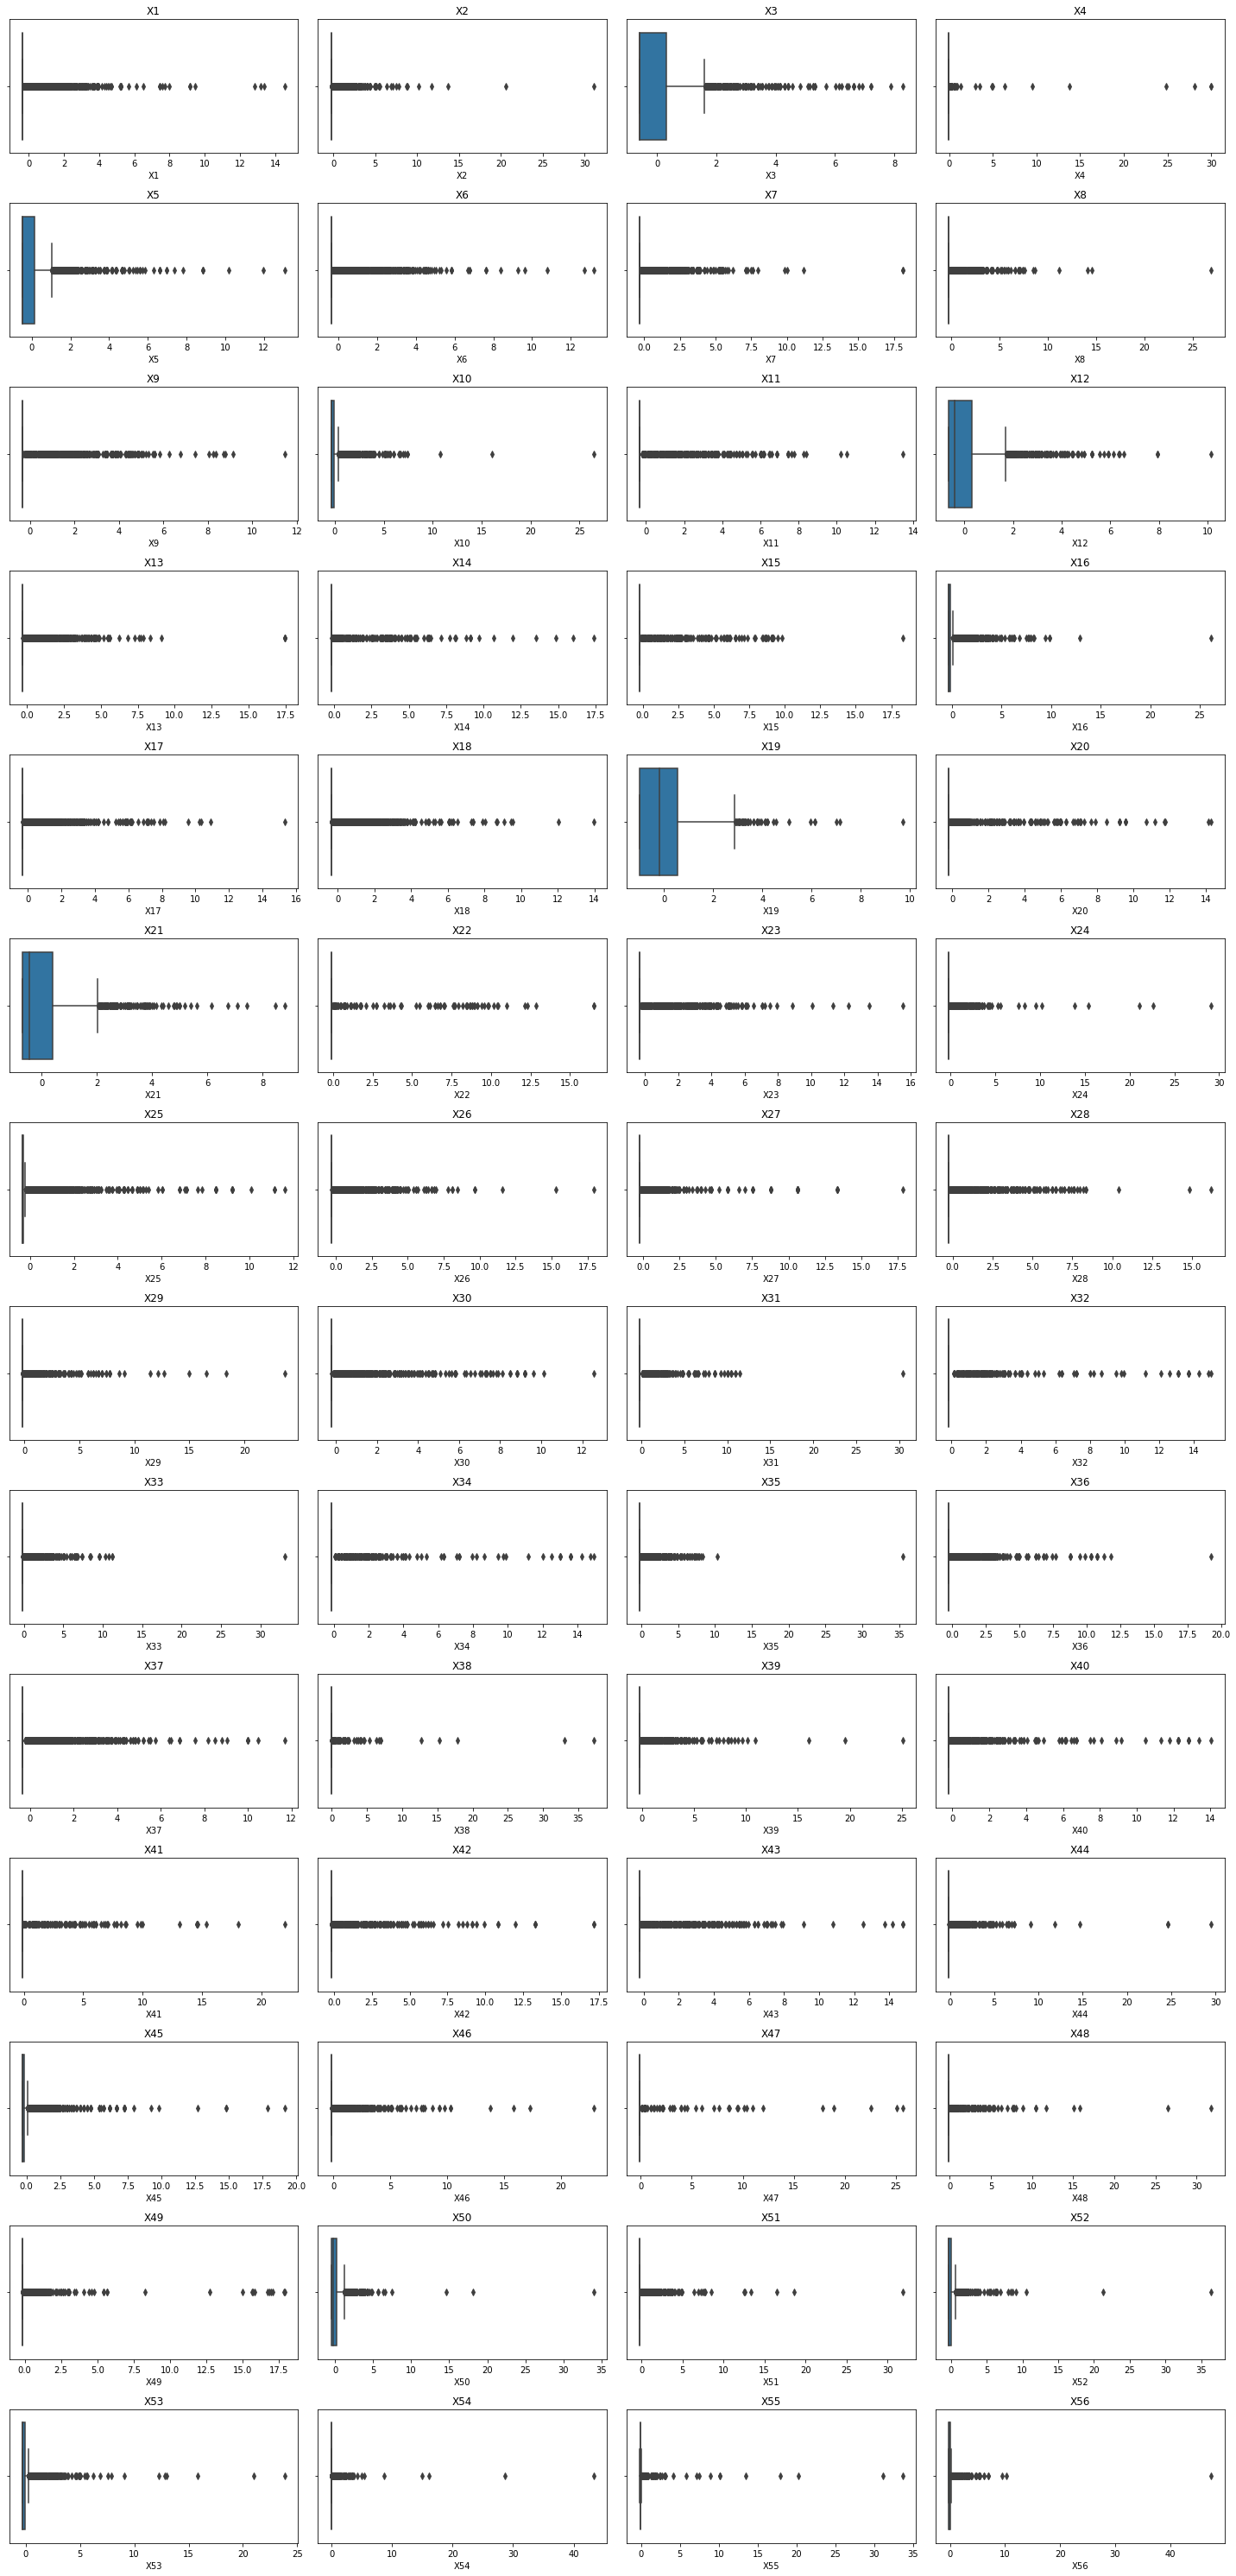

In [28]:
# looking for outliers after standardization
plt.figure(figsize =(20,50))
for i , variable in enumerate(X.columns[:-1]):
    plt.subplot(17, 4, i +1)
    sns.boxplot(x = X[variable])
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

* Standardization reduced the some of the outliers.
* But still outliers are present in dataset.
* So, will be using models and techniques which robust to outliers.

# **Feature Selection**

## **PCA for Feature Selection**

* Data contain outliers.
* PCA is sensitive to outliers.
* Data contains only 3766 rows, removing outliers will reduce data.

## **Random Forest Classifer for Feature Selection**

### Splitting Data

In [29]:
# Splitting data into training and validation set in 4:1 ratio.(80%:20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
X_train.shape

(2891, 57)

In [31]:
X_val.shape

(723, 57)

In [32]:
# percentage of class in training dataset
y_train.value_counts()/y_train.shape[0]*100

0    60.221377
1    39.778623
Name: Y, dtype: float64

In [33]:
# percentage of class in validation dataset
y_val.value_counts()/y_val.shape[0]*100

0    60.165975
1    39.834025
Name: Y, dtype: float64

* For training and validation dataset, class proprtion is almost same.

In [34]:
# creating intance of Random Forest Classifier
rfs = RandomForestClassifier()
# fitting model
rfs.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
# getting importance values for each feature
feature_importance = rfs.feature_importances_

In [36]:
feature_importance

array([0.0034546 , 0.0062336 , 0.00877652, 0.00078479, 0.02854008,
       0.0088754 , 0.08464172, 0.0111533 , 0.00678894, 0.00764505,
       0.0101186 , 0.01216771, 0.00457791, 0.00172906, 0.00130057,
       0.07471411, 0.01422758, 0.00874084, 0.02928976, 0.00362352,
       0.05787863, 0.00171302, 0.02609997, 0.03399547, 0.05071494,
       0.01874485, 0.01851573, 0.00536155, 0.00166054, 0.00344196,
       0.00115136, 0.00050837, 0.00272315, 0.00087909, 0.00355059,
       0.00250284, 0.01282403, 0.00077666, 0.00469866, 0.00119989,
       0.00104251, 0.00737865, 0.00154403, 0.00177609, 0.01050506,
       0.01344858, 0.00030272, 0.0011254 , 0.00498526, 0.01299953,
       0.00327862, 0.10549864, 0.09131749, 0.00560677, 0.06312186,
       0.05356674, 0.04617707])

In [37]:
# Converting above feature importance array into datframe
features_df = pd.DataFrame(feature_importance, index=X.columns)

In [38]:
# sorting dataframe in decreasing order of feature importance
features_df.sort_values(0, ascending = False, inplace = True)

In [39]:
# giving index to dataframe
features_df.reset_index(inplace=True)

In [40]:
# Changing column name
features_df.set_axis(['feature', 'importance'], axis=1, inplace=True)

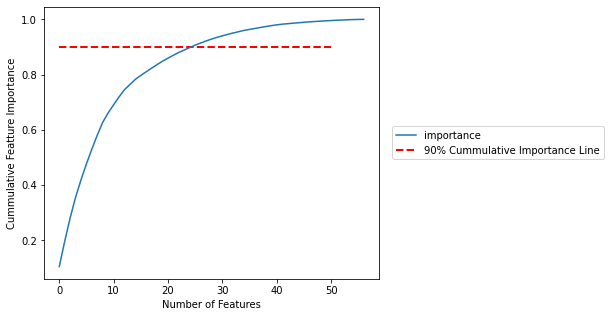

In [41]:
# Cumulative feature importance plot and thresold line at 0.9
plt.figure(figsize =(6,5))
features_df['importance'].cumsum().plot()
plt.hlines(y=0.9, xmin=0, xmax=50, colors='r', linestyles='--', lw=2, label='90% Cummulative Importance Line')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('Number of Features')
plt.ylabel('Cummulative Featture Importance')
plt.show()

In [42]:
# getting number of features where cumulative feature importance is equal to 0.9
features_df['importance'].cumsum().div(features_df['importance'].sum()).le(0.90).sum()

25

In [43]:
# selecting first 24 top features
final_df = features_df[0:24]

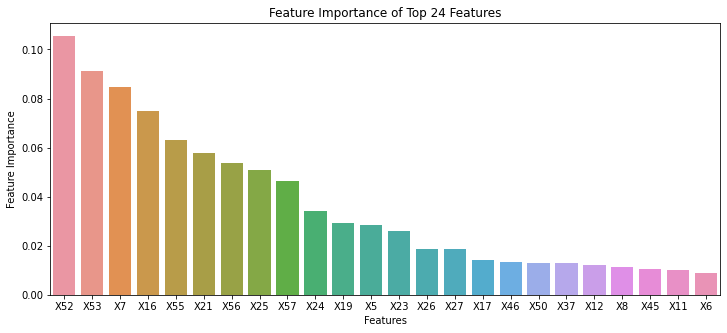

In [44]:
# bar plot for top features
plt.figure(figsize=(12,5))
sns.barplot(y='importance', x = 'feature', data = final_df)
plt.title('Feature Importance of Top 24 Features')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

In [46]:
# list of top 24 features 
top_features = list(final_df['feature'])

In [47]:
# training dataset with top 24 features
X_train_final = X_train[top_features]

In [48]:
# validation dataset with top 24 features
X_val_final = X_val[top_features]

# **Model Making**

* Data contains outliers.
* Classification models such as Logistic Regressio, KNN and bossting algorithms like gradient boosting and XGboost are sensitive to outliers.
* But Decision Tree models and Random Forest Classifier are robust to outliers.
* So, Decision Tree and Random Forest Classifiers will be used to build a model.

## **Decision Tree Classifier:**

### **Base Model**

In [ ]:
# Using Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)          
dtc = classifier.fit(X_train_final, y_train)

In [ ]:
# class prediction
y_val_pred_dtc = dtc.predict(X_val_final)                   # for validation set
y_train_pred_dtc = dtc.predict(X_train_final)               # for training set

In [ ]:
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
val_accuracy_dtc = round(accuracy_score(y_val_pred_dtc,y_val), 3)
roc_score_dtc = round(roc_auc_score(y_val_pred_dtc,y_val), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on validation data is ", val_accuracy_dtc)
print("The roc_score on validation data is ", roc_score_dtc)

The accuracy on train data is  0.999
The accuracy on validation data is  0.917
The roc_score on validation data is  0.912


* Difeerence between train and validation accuracy show overfitting.
* So performed cross validation and hyperparameter tunning to reduce overfitting.

### **Hyperparameter Tuning on Decision Tree Classifier:**

In [ ]:
# The maximum depth of the tree
depth_of_tree = [15,20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Grid search
dtc_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring="neg_log_loss")
# fitting model
dtc_grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'min_samples_leaf': [10, 20, 30, 40],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=40,
                       min_samples_split=0.05)

In [ ]:
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 40, 'min_samples_split': 0.05}

In [ ]:
# Creating model with best estimators
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_val_pred_dtc_grid=dtc_optimal_model.predict(X_val_final)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train_final)

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
val_accuracy_dtc_grid = round(accuracy_score(y_val_pred_dtc_grid,y_val), 3)
auc_dtc_grid = round(roc_auc_score(y_val_pred_dtc_grid,y_val), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on validation data is ", val_accuracy_dtc_grid)
print("The auc on validation data is ", auc_dtc_grid)

The accuracy on train data is  0.899
The accuracy on validation data is  0.893
The auc on validation data is  0.895


* Accuracy on train and validation almost same, that is no overfitting.

## **Random Forest Classifier:**

## **Base Model**

In [ ]:
#fitting data into Random Forest Classifier
rf_classifier=RandomForestClassifier()
rfc = rf_classifier.fit(X_train_final, y_train)

In [ ]:
#class prediction of y
y_val_pred_rfc=rfc.predict(X_val_final)
y_train_pred_rfc=rfc.predict(X_train_final)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
val_accuracy_rfc = round(accuracy_score(y_val_pred_rfc,y_val), 3)
roc_score_rfc = round(roc_auc_score(y_val_pred_rfc,y_val), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on validation data is ", val_accuracy_rfc)
print("The roc_score on validation data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on validation data is  0.943
The roc_score on validation data is  0.946


* Difeerence between train and validation accuracy show overfitting.
* So performed cross validation and hyperparameter tunning to reduce overfitting.

## **Hyperparameter Tunning on Random Forest Classifier:**

In [ ]:
# Number of trees
n_estimators = [150,200,300]

# Maximum depth of trees
max_depth = [5,10,15]

# Minimum number of samples required to split a node
min_samples_split = [20,30,40,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Grid search
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid = param_dict, cv=2,
                       verbose=0, scoring="neg_log_loss")
# fitting model
rfc_grid.fit(X_train_final,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [20, 30, 40, 50],
                         'n_estimators': [150, 200, 300]},
             scoring='neg_log_loss')

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=40, min_samples_split=30,
                       n_estimators=200)

In [ ]:
rfc_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 30,
 'n_estimators': 200}

In [ ]:
# built a model using best estimators
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_val_pred_rfc_grid=rfc_optimal_model.predict(X_val_final)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train_final)

In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
val_accuracy_rfc_grid = round(accuracy_score(y_val_pred_rfc_grid,y_val), 3)
auc_rfc_grid = round(roc_auc_score(y_val_pred_rfc_grid,y_val), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on validation data is ", val_accuracy_rfc_grid)
print("The auc on validation data is ", auc_rfc_grid)

The accuracy on train data is  0.93
The accuracy on validation data is  0.928
The auc on validation data is  0.932


* Not much difference between train and validation accuracy, that is no overfittiing.


### Achieved highest accuracy of 93% with hyperparameter tuning on Random Forest Classifier.